In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def read_bin(filename,N):
	with open(filename, 'rb') as f:
		data = np.fromfile(f, dtype=np.int32)

	data = data.reshape((N, N))
	return data

def segment_time(t_0,t_max):
	bins= np.arange(0,t_max+1,t_0)
	segments = []
	for i in range(len(bins)):
		segments.append(bins[i:i+2])
	return segments[:-1]

def linear_map(input_range, output_range, value):
    (input_min, input_max) = input_range
    (output_min, output_max) = output_range

    # Calculate the slope and y-intercept of the linear function
    slope = (output_max - output_min) / (input_max - input_min)
    y_intercept = output_min - slope * input_min

    # Return the mapped value
    return slope * value + y_intercept

In [2]:
data=[]
data_folder = 'datos'
config=np.genfromtxt(data_folder+'/config.csv', delimiter=',', skip_header=0)
N=int(config[0])
t_max=int(config[1])
for i in range(t_max):
	# print(i)
	data.append(
		read_bin(data_folder+'/datos'+str(i)+'.bin',N)
		)

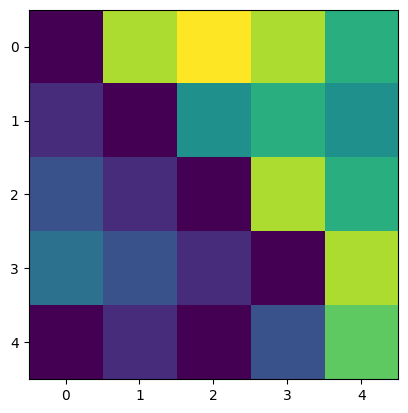

In [3]:
plt.imshow(data[-1])

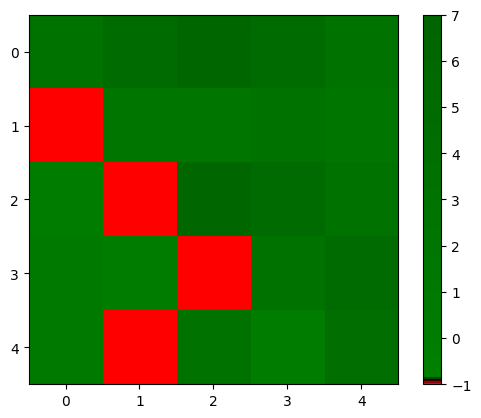

In [58]:
from matplotlib.colors import LinearSegmentedColormap, Normalize



max_val=np.max(data[-1])
min_val=np.min(data[-1])
linear_map((-1,max_val),(0,1),0)

colors = ["red", "black", "green", "darkgreen"]
values = [-1, 0, 1, 100]
normalized_values = (values - np.min(values)) / (np.max(values) - np.min(values))
cmap_arboles = LinearSegmentedColormap.from_list("my_colormap", list(zip(normalized_values, colors)))

# Normalize your data to match the range of your colormap
norm = Normalize(vmin=-1, vmax=max_val)

# Use colormap and normalization in your plot
plt.imshow(data[-2], cmap=cmap_arboles, norm=norm)
plt.colorbar()
plt.show()

In [151]:

import os 
data_folder='datos'
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]
plt.figure(figsize=(16,9),dpi=200)
plt.rcParams.update({'font.size': 22})
dataframes = []
consecutive_fires = []
p_list=[]
f_list=[]
for csv_file in csv_files[1:]:
	dataframes.append( np.genfromtxt(data_folder+"/"+csv_file, delimiter=','))

	consecutive = np.genfromtxt(data_folder+"/"+csv_file, delimiter=',')
	consecutive_fires.append( consecutive[:,1])

	filename_without_ext = os.path.splitext(csv_file)[0]
	text_after_hash = (filename_without_ext.split('#')[1] if '#' in filename_without_ext else '')
	p, f = text_after_hash.split('-')
	p_list.append(float(p))
	f_list.append(float(f))





<Figure size 3200x1800 with 0 Axes>

In [152]:
ii=0

histogram_x = []
histogram_y = []
ii=0
for fire in consecutive_fires:
	S=fire
	Sx = np.arange(1, max(S)+1, 1)
	Sy = []
	sy = 0

	for sx in Sx:
		for k in range(0,len(S)):
			if S[k] == sx:
				sy += 1
		Sy += [sy/len(S)]
		sy = 0
	histogram_x.append(Sx)
	histogram_y.append(Sy)
	
	ii+=1

print(len(histogram_x))


17


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5180\2554779574.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable)


17


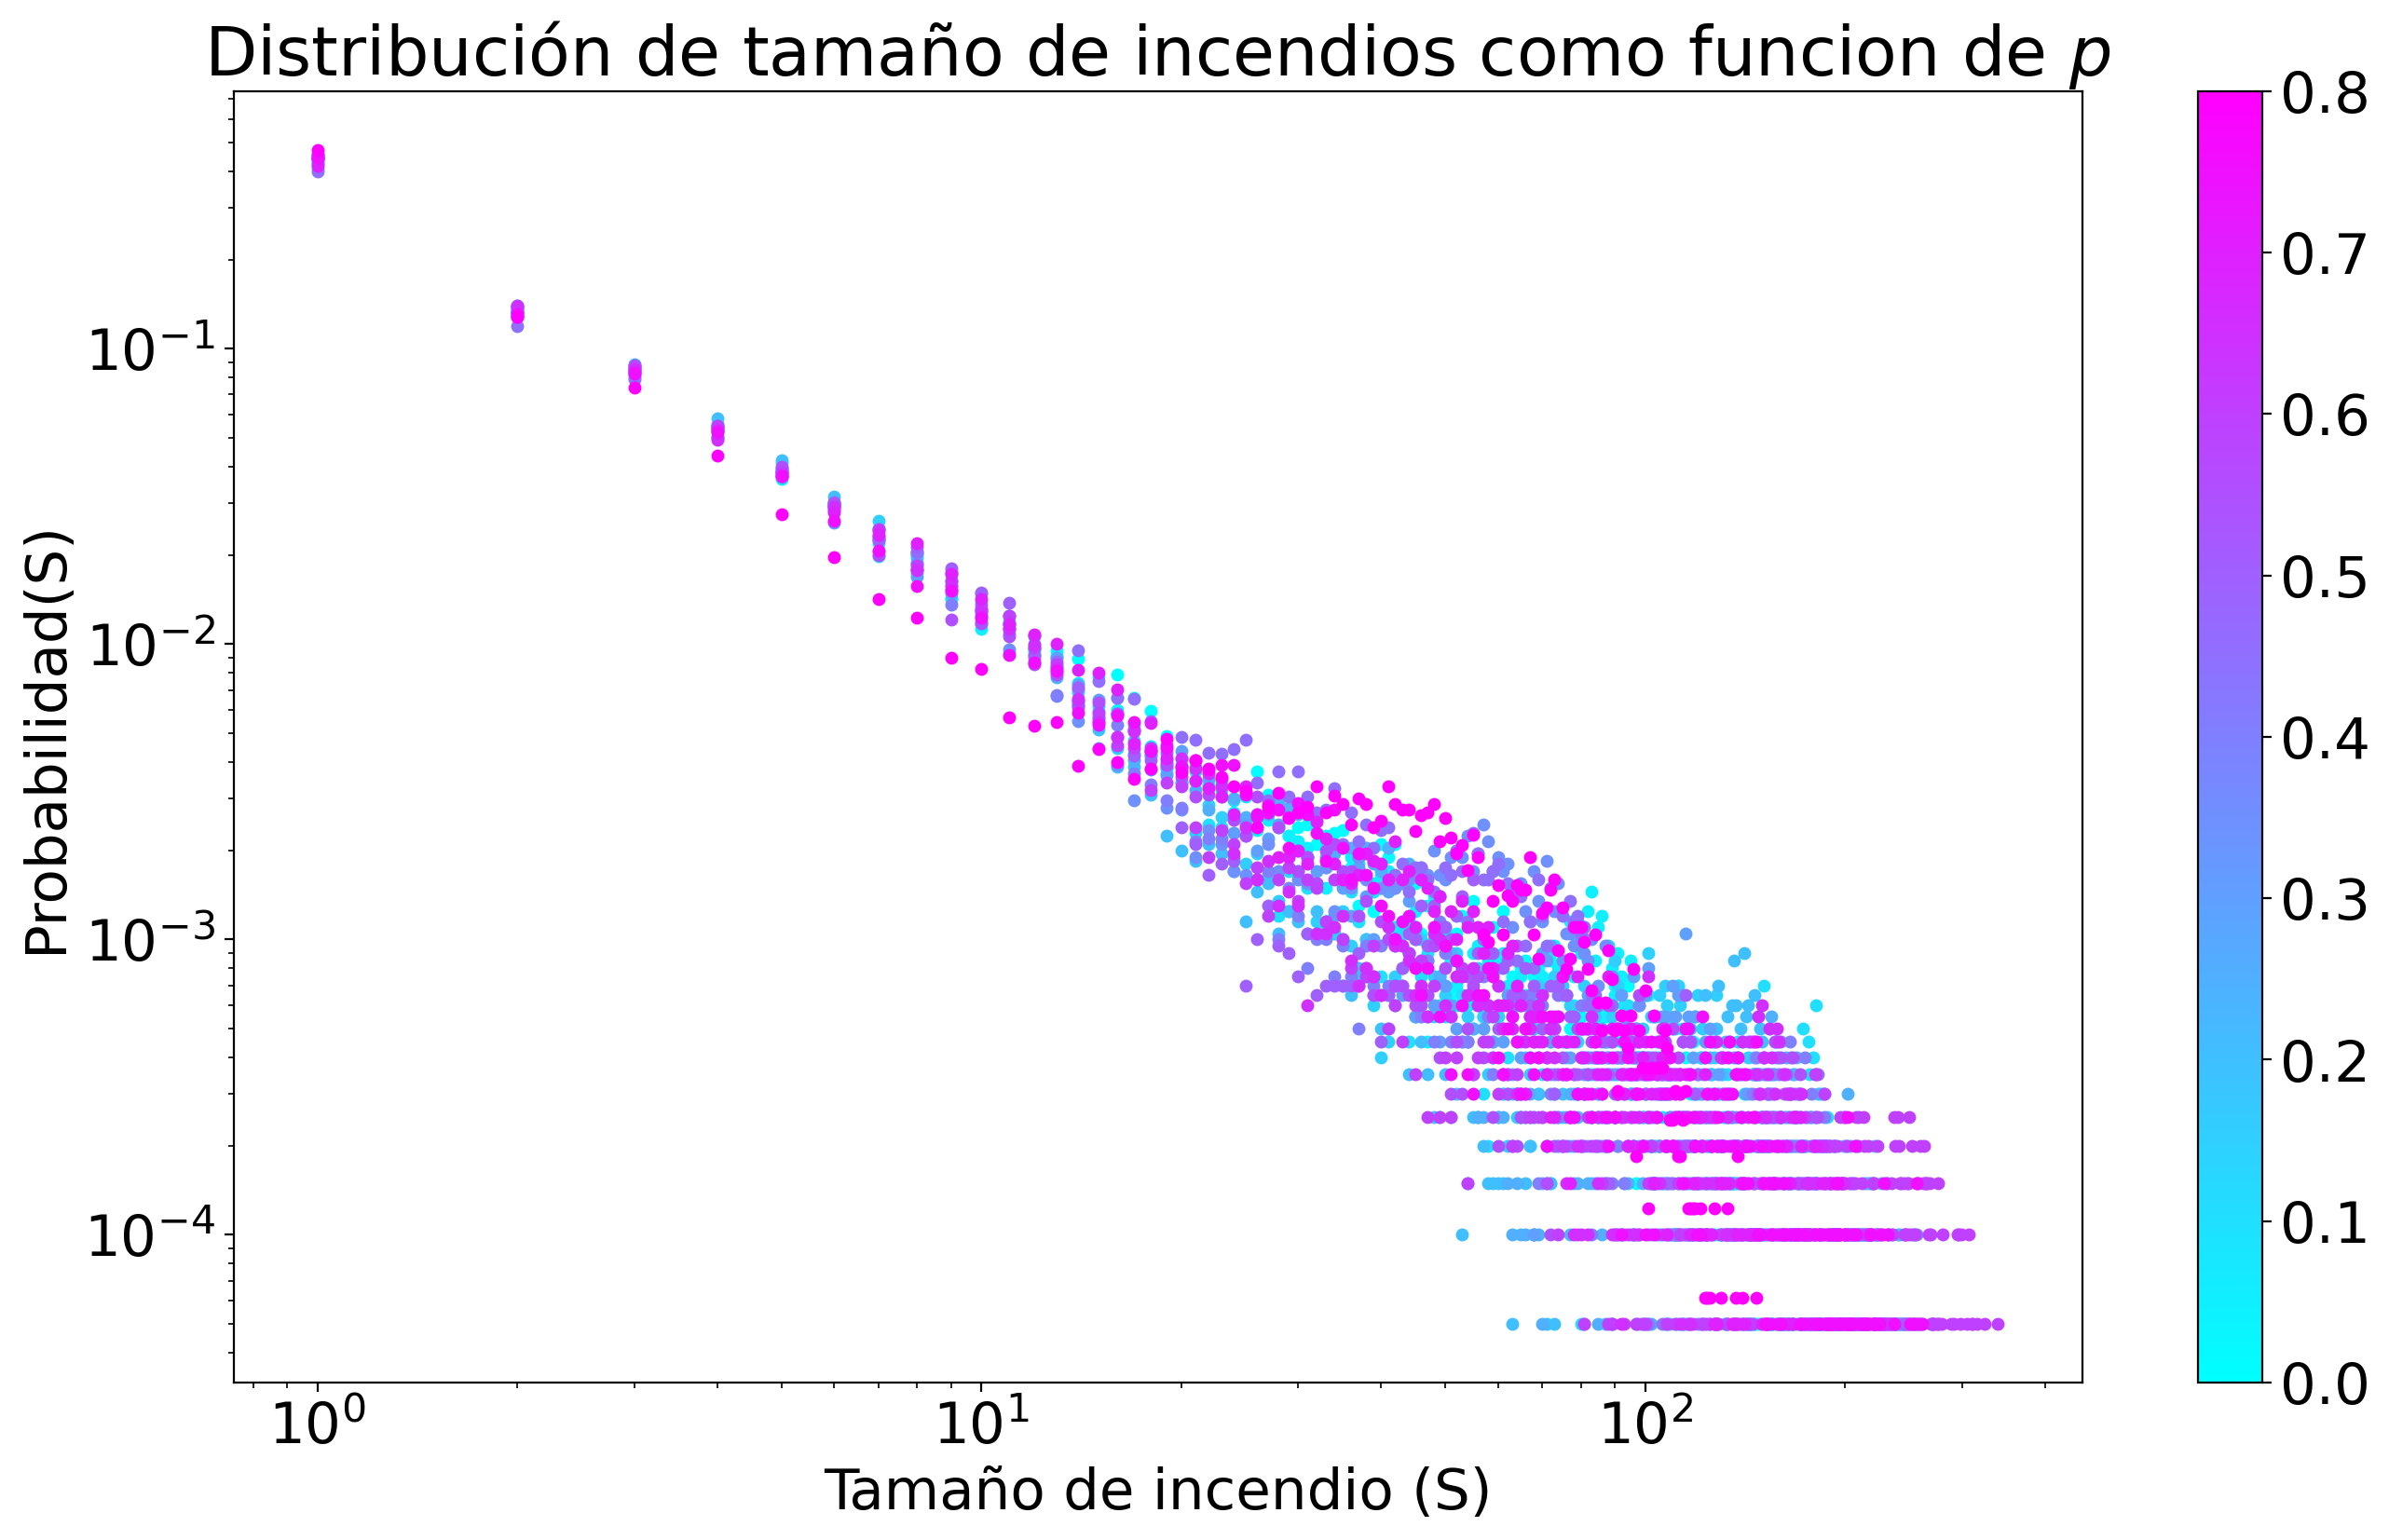

In [156]:
import matplotlib.cm as cm
norm = plt.Normalize(min(p_list), max(p_list))

# Define the colormap
cmap = cm.get_cmap('cool')

# Create the mappable object
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

plt.figure(figsize=(16,9),dpi=200)
for ii in range(0,len(histogram_x)):
	
	plt.plot(histogram_x[ii],histogram_y[ii],color=mappable.to_rgba(p_list[ii]),label='f='+str(f_list[ii])
		  ,marker='o',markersize=4,linestyle='None')
	
plt.yscale('log')
plt.xscale('log')
plt.colorbar(mappable)
plt.xlabel('Tamaño de incendio (S)')
plt.ylabel('Probabilidad(S)')
plt.title('Distribución de tamaño de incendios como funcion de $p$')
print(len(histogram_x))